In [1]:
# The dataset comes from Investing.com (will fill out the backgound information later on on the datasets)
#https://www.investing.com/crypto/bitcoin/historical-data
#https://www.cryptodatadownload.com/index.html

print("Courtesy of Patricia Estevao, source=Google Images")
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://www.weusecoins.com/images/bitcoin-transaction-life-cycle-high-resolution.png")

Courtesy of Patricia Estevao, source=Google Images


In [2]:
ls  #check to see if the current directory contains the datasets

03-Time-Series-Exercise-Solutions-Final.ipynb
Bitcoin Prediction.ipynb
BitcoinHistoricalDataByDay.xlsx
BitcoinHistoricalDataByDay2010to2018.xlsx
BitcoinHistoricalDatabyMonth.xlsx
BitcoinHistoricalDatabyWeek.xlsx
Coinbase_BTCUSD_1h.xlsx
Elaine's Evaluating+multiple+coins.ipynb
Elaine's project code.ipynb
Final_Project_Cryptocurrency_Bitcoin.ipynb
Lecture Notes/
Organize+Final+project+Python+analysis++.ipynb
Untitled.ipynb
final+project+lines+of+code(1).ipynb
final+project+lines+of+code(2).ipynb
final+project+lines+of+code(3).ipynb


In [3]:
# Import necessary libraries for this project
import numpy as np
import pylab as plb
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from itertools import product
from datetime import datetime
from scipy import stats  # Import Scipy statistical libraries for linear regression analysis
# Import ARMA pacakges used for the prediction of time-series
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

from sklearn.metrics import mean_squared_error
from os import path
import csv
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

/Users/Jing/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [4]:
# Part 1: Data Import and Initial Analysis

In [5]:
#load the data: The dataset contains statistics from May 13th, 2017 to June 13th, 2018
df_byday= pd.read_excel("BitcoinHistoricalDataByDay.xlsx")

#Show the datset from the past month of Bitcoin ststistics
df_byday.head(32)

Date   Price    Open    High     Low     Vol.  Change _Percentage
0  2018-06-14  6487.0  6312.3  6521.7  6283.6  245.71K              0.0277
1  2018-06-13  6312.3  6558.5  6624.6  6129.1  237.48K             -0.0375
2  2018-06-12  6558.2  6885.9  6887.2  6476.0  178.26K             -0.0476
3  2018-06-11  6885.9  6775.2  6910.8  6657.2  174.88K              0.0164
4  2018-06-10  6775.1  7515.8  7516.3  6668.1  275.69K             -0.0985
5  2018-06-09  7515.8  7622.1  7689.0  7493.3   97.56K             -0.0140
6  2018-06-08  7622.1  7697.9  7710.5  7556.9  112.88K             -0.0098
7  2018-06-07  7697.8  7661.0  7754.7  7657.7  124.00K              0.0048
8  2018-06-06  7661.0  7631.5  7699.1  7504.4  130.66K              0.0039
9  2018-06-05  7631.5  7507.4  7672.6  7391.0  145.23K              0.0169
10 2018-06-04  7504.3  7729.3  7759.9  7468.4  141.01K             -0.0291
11 2018-06-03  7729.3  7646.6  7775.0  7611.3  116.68K              0.0108
12 2018-06-02  7646.6  7530.8  7694.5  7467.9  121.18K              0.0154
13 2018-06-01  7530.8  7502.5  7610.4  7375.8  135.92K              0.0038
14 2018-05-31  7502.6  7400.8  7611.9  7355.0  144.52K              0.0139
15 2018-05-30  7400.1  7469.2  7565.2  7306.8  140.37K             -0.0091
16 2018-05-29  7467.7  7119.3  7533.0  7069.8  186.97K              0.0489
17 2018-05-28  7119.3  7367.3  7446.9  7090.6  152.29K             -0.0336
18 2018-05-27  7366.7  7361.9  7411.8  7267.5  103.29K              0.0007
19 2018-05-26  7361.3  7478.5  7619.3  7331.5  103.07K             -0.0156
20 2018-05-25  7477.7  7593.9  7653.4  7355.6  161.82K             -0.0152
21 2018-05-24  7592.9  7512.3  7736.6  7293.4  211.11K              0.0107
22 2018-05-23  7512.3  8005.7  8047.4  7467.6  237.60K             -0.0617
23 2018-05-22  8006.0  8403.8  8414.5  7979.3  137.51K             -0.0473
24 2018-05-21  8403.3  8529.5  8550.6  8375.5  115.52K             -0.0147
25 2018-05-20  8529.0  8243.9  8580.4  8184.7  113.76K              0.0344
26 2018-05-19  8245.1  8244.7  8389.1  8153.2  107.89K             -0.0001
27 2018-05-18  8245.7  8064.4  8273.6  7939.8  150.32K              0.0227
28 2018-05-17  8063.0  8344.6  8458.7  8022.3  154.36K             -0.0337
29 2018-05-16  8344.4  8477.0  8496.4  8120.1  188.03K             -0.0156
30 2018-05-15  8477.0  8674.0  8842.1  8436.5  179.62K             -0.0227
31 2018-05-14  8674.1  8693.4  8878.3  8305.1  212.05K             -0.0022

In [6]:
#Print out the # of rows by columns in df_byday dataframe
df_byday.values.shape

(32, 7)

In [7]:
# Initial Analysis
print (df_byday.describe())
print ("=============================================================================")
print (df_byday.dtypes)

             Price         Open         High          Low  Change _Percentage
count    32.000000    32.000000    32.000000    32.000000           32.000000
mean   7604.559375  7673.781250  7791.734375  7462.343750           -0.008656
std     591.782794   585.769035   586.443234   586.410661            0.030101
min    6312.300000  6312.300000  6521.700000  6129.100000           -0.098500
25%    7391.750000  7452.100000  7557.150000  7286.925000           -0.024300
50%    7561.850000  7608.000000  7696.800000  7467.750000           -0.005650
75%    8020.250000  8109.275000  8302.475000  7949.675000            0.011575
max    8674.100000  8693.400000  8878.300000  8436.500000            0.048900
Date                  datetime64[ns]
Price                        float64
Open                         float64
High                         float64
Low                          float64
Vol.                          object
Change _Percentage           float64
dtype: object


In [8]:
# Reaggregate dateframes for graph analysis
df1_byday = df_byday[['Date', 'Open', 'High', 'Low']]
df2_byday = df_byday[['Date','Price']]
df1_byday.head(5)

# Setting the Date as Index
df1 = df1_byday.set_index('Date')
df1.sort_index(inplace=True)
print(type(df1))
print ("=======================================")
print(df1.head(5))
print ("=======================================")
print(df1.tail(5))
print ("=======================================")
df2 = df2_byday.set_index('Date')
df2.sort_index(inplace=True)
print(type(df2))
print("=======================================")
print(df2.head(5))
print ("=======================================")
print(df2.tail(5))

<class 'pandas.core.frame.DataFrame'>
              Open    High     Low
Date                              
2018-05-14  8693.4  8878.3  8305.1
2018-05-15  8674.0  8842.1  8436.5
2018-05-16  8477.0  8496.4  8120.1
2018-05-17  8344.6  8458.7  8022.3
2018-05-18  8064.4  8273.6  7939.8
              Open    High     Low
Date                              
2018-06-10  7515.8  7516.3  6668.1
2018-06-11  6775.2  6910.8  6657.2
2018-06-12  6885.9  6887.2  6476.0
2018-06-13  6558.5  6624.6  6129.1
2018-06-14  6312.3  6521.7  6283.6
<class 'pandas.core.frame.DataFrame'>
             Price
Date              
2018-05-14  8674.1
2018-05-15  8477.0
2018-05-16  8344.4
2018-05-17  8063.0
2018-05-18  8245.7
             Price
Date              
2018-06-10  6775.1
2018-06-11  6885.9
2018-06-12  6558.2
2018-06-13  6312.3
2018-06-14  6487.0


In [9]:
df2_byday = df_byday[['Date','Price']]
df2 = df2_byday.set_index('Date')
df2.sort_index(inplace=True)
print(df2.head(5))
print(df2.tail(5))
df2.iplot(color="purple")

             Price
Date              
2018-05-14  8674.1
2018-05-15  8477.0
2018-05-16  8344.4
2018-05-17  8063.0
2018-05-18  8245.7
             Price
Date              
2018-06-10  6775.1
2018-06-11  6885.9
2018-06-12  6558.2
2018-06-13  6312.3
2018-06-14  6487.0


In [10]:
# Plot the df1 dataframe of the bitcoin opening price from 5/14/2018 to 6/14/2018 (Comment: I need to fix the legend)
df1.iplot()
#df1.title("Bitcoin Cryptocurrency Price from 5/14/2018 thru 6/14/2018")

In [11]:
#load the data: The dataset contains last 8 years' weekly statistics from 2010 to 2018
df_byweek= pd.read_excel("BitcoinHistoricalDataByWeek.xlsx")

#Show the datset from the past month of Bitcoin ststistics
df_byweek.head(10)

Date   Price    Open    High     Low     Vol.  Change_Percentage
0 2018-06-10  6487.3  7515.8  7516.3  6129.1        -            -0.1368
1 2018-06-03  7515.8  7646.6  7775.0  7391.0        -            -0.0171
2 2018-05-27  7646.6  7361.9  7694.5  7069.8        -             0.0388
3 2018-05-20  7361.3  8243.9  8597.4  7293.4  221.25K            -0.1072
4 2018-05-13  8245.1  8483.6  8758.4  8055.5    1.16M            -0.0253
5 2018-05-06  8459.5  9859.4  9957.7  8184.1    1.28M            -0.1415
6 2018-04-29  9853.5  9352.2  9992.8  8851.0    1.16M             0.0536
7 2018-04-22  9352.4  8923.6  9753.1  8669.8    1.58M             0.0481
8 2018-04-15  8923.1  8004.6  9027.7  7852.8    1.28M             0.1148
9 2018-04-08  8004.4  6905.9  8228.0  6633.2    1.51M             0.1591

In [12]:
# Show the basic statistical info. of the weekly dataset
# Initial Analysis
print (df_byweek.describe())
print ("============================================================")
print (df_byweek.dtypes)

              Price          Open          High           Low  \
count    414.000000    414.000000    414.000000    414.000000   
mean    1252.682126   1237.021256   1381.361353   1076.713527   
std     2850.971527   2839.973026   3196.770206   2365.116815   
min        0.000000      0.000000      0.000000      0.000000   
25%       11.100000     11.000000     12.000000      9.800000   
50%      265.050000    260.500000    289.150000    244.000000   
75%      651.775000    650.975000    698.850000    606.125000   
max    19345.500000  19346.600000  19870.600000  13048.300000   

       Change_Percentage  
count         414.000000  
mean            0.042696  
std             0.202304  
min            -0.515900  
25%            -0.042475  
50%             0.011200  
75%             0.087075  
max             1.275900  
Date                 datetime64[ns]
Price                       float64
Open                        float64
High                        float64
Low                        

In [13]:
# Reaggregate dateframe for graph analysis
df1_byweek = df_byweek[['Date', 'Open', 'High', 'Low']]
df1_byweek.head(5)

Date    Open    High     Low
0 2018-06-10  7515.8  7516.3  6129.1
1 2018-06-03  7646.6  7775.0  7391.0
2 2018-05-27  7361.9  7694.5  7069.8
3 2018-05-20  8243.9  8597.4  7293.4
4 2018-05-13  8483.6  8758.4  8055.5

In [14]:
# Setting the Date as Index
df3 = df1_byweek.set_index('Date')
df3.sort_index(inplace=True)
print(type(df3))
print(df3.head(5))
print(df3.tail(5))

<class 'pandas.core.frame.DataFrame'>
            Open  High  Low
Date                       
2010-07-17   0.0   0.0  0.0
2010-07-18   0.0   0.1  0.1
2010-07-25   0.1   0.1  0.1
2010-08-01   0.1   0.1  0.1
2010-08-08   0.1   0.1  0.1
              Open    High     Low
Date                              
2018-05-13  8483.6  8758.4  8055.5
2018-05-20  8243.9  8597.4  7293.4
2018-05-27  7361.9  7694.5  7069.8
2018-06-03  7646.6  7775.0  7391.0
2018-06-10  7515.8  7516.3  6129.1


In [15]:
# Plot the df1 dataframe of the bitcoin opening price from 5/14/2018 to 6/14/2018 (Comment: I need to fix the legend)
%matplotlib inline
df3.iplot()
#plt.title("Bitcoin Cryptocurrency Price from 07/17/2010 thru 6/14/2018 on a WEEKLY basis")

In [16]:
#load the data: The dataset contains last 8 years' DAILY statistics from 2010 to 2018
df_byday2010to2018= pd.read_excel("BitcoinHistoricalDataByDay2010to2018.xlsx")

#Show the datset from the past month of Bitcoin ststistics
df_byday2010to2018.head(10)

Date   Price    Open    High     Low     Vol.  Change _Percentage
0 2018-06-13  6312.3  6558.5  6624.6  6129.1  237.48K             -0.0375
1 2018-06-12  6558.2  6885.9  6887.2  6476.0  178.26K             -0.0476
2 2018-06-11  6885.9  6775.2  6910.8  6657.2  174.88K              0.0164
3 2018-06-10  6775.1  7515.8  7516.3  6668.1  275.69K             -0.0985
4 2018-06-09  7515.8  7622.1  7689.0  7493.3   97.56K             -0.0140
5 2018-06-08  7622.1  7697.9  7710.5  7556.9  112.88K             -0.0098
6 2018-06-07  7697.8  7661.0  7754.7  7657.7  124.00K              0.0048
7 2018-06-06  7661.0  7631.5  7699.1  7504.4  130.66K              0.0039
8 2018-06-05  7631.5  7507.4  7672.6  7391.0  145.23K              0.0169
9 2018-06-04  7504.3  7729.3  7759.9  7468.4  141.01K             -0.0291

In [17]:
# Show the basic statistical info. of the monthly dataset
# Initial Analysis
#for i in range(0, len(df_byday2010to2018.columns)):
    #df_byday2010to2018.iloc[:,i] = df_byday2010to2018.to_numeric(df_byday2010to2018.iloc[:,i], errors='ignore')
    # errors='ignore' lets strings remain as 'non-null objects'
print (df_byday2010to2018.describe())
print ("=============================================================================")
print (df_byday2010to2018.dtypes)

              Price          Open          High           Low  \
count   2888.000000   2888.000000   2888.000000   2888.000000   
mean    1236.618490   1234.407168   1280.526073   1179.834037   
std     2808.680001   2807.138515   2924.173373   2655.027626   
min        0.100000      0.000000      0.100000      0.000000   
25%       11.000000     11.000000     11.300000     10.800000   
50%      268.150000    267.400000    276.150000    259.700000   
75%      651.250000    651.025000    663.575000    632.625000   
max    19345.500000  19346.600000  19870.600000  18750.900000   

       Change _Percentage  
count         2888.000000  
mean             0.005913  
std              0.088296  
min             -0.572100  
25%             -0.010625  
50%              0.000000  
75%              0.019400  
max              3.368400  
Date                  datetime64[ns]
Price                        float64
Open                         float64
High                         float64
Low           

In [18]:
#check the maximium value of Bitcoin currency
BitcoinMax = df_byday2010to2018['Price'].max()
print("The highest Bitcoin price is", "$",BitcoinMax)

#Check the minimium value of Bitcoin currency
BitcoinMin = df_byday2010to2018['Price'].min()
print("The lowest Bitcoin price is" , "$",BitcoinMin)

# Show the row when Bitcoin is the highest
df_byday2010to2018[df_byday2010to2018['Price'] == BitcoinMax]

The highest Bitcoin price is $ 19345.5
The lowest Bitcoin price is $ 0.1


Date    Price     Open     High      Low     Vol.  \
179 2017-12-16  19345.5  17594.1  19587.7  17318.5  112.17K   

     Change _Percentage  
179              0.0989

In [19]:
# Retrieve the rows when Bitcoin is the lowest price
df_min = df_byday2010to2018[df_byday2010to2018['Price'] == BitcoinMin]
df_min['Date'].max()

Timestamp('2010-10-25 00:00:00')

In [20]:
df_min['Date'].min()

Timestamp('2010-07-18 00:00:00')

In [21]:
minDuration = [df_min['Date'].max() - df_min['Date'].min()]
minDuration

[Timedelta('99 days 00:00:00')]

In [22]:
# Reaggregate dateframe for graph analysis
df4_byday2010to2018 = df_byday2010to2018[['Date', 'Open', 'High', 'Low']]
df4_byday2010to2018.head(5)

Date    Open    High     Low
0 2018-06-13  6558.5  6624.6  6129.1
1 2018-06-12  6885.9  6887.2  6476.0
2 2018-06-11  6775.2  6910.8  6657.2
3 2018-06-10  7515.8  7516.3  6668.1
4 2018-06-09  7622.1  7689.0  7493.3

In [23]:
df4_byday2010to2018.tail(5)

Date  Open  High  Low
2883 2010-07-22   0.1   0.1  0.1
2884 2010-07-21   0.1   0.1  0.1
2885 2010-07-20   0.1   0.1  0.1
2886 2010-07-19   0.1   0.1  0.1
2887 2010-07-18   0.0   0.1  0.1

In [24]:
# Setting the Date as Index
df4 = df4_byday2010to2018.set_index('Date')
df4.sort_index(inplace=True)
print(type(df4))
print(df4.head(5))
print("===================================")
print(df4.tail(5))

<class 'pandas.core.frame.DataFrame'>
            Open  High  Low
Date                       
2010-07-18   0.0   0.1  0.1
2010-07-19   0.1   0.1  0.1
2010-07-20   0.1   0.1  0.1
2010-07-21   0.1   0.1  0.1
2010-07-22   0.1   0.1  0.1
              Open    High     Low
Date                              
2018-06-09  7622.1  7689.0  7493.3
2018-06-10  7515.8  7516.3  6668.1
2018-06-11  6775.2  6910.8  6657.2
2018-06-12  6885.9  6887.2  6476.0
2018-06-13  6558.5  6624.6  6129.1


In [25]:
# Plot the df1 dataframe of the bitcoin opening price from 5/14/2018 to 6/14/2018 (Comment: I need to fix the legend)
df4.iplot()
#plt.title("Bitcoin Cryptocurrency Price from 7/18/2010 thru 6/14/2018 on a DAILY basis")

In [26]:
# Part 2 Data Visualization and Statistical Analysis

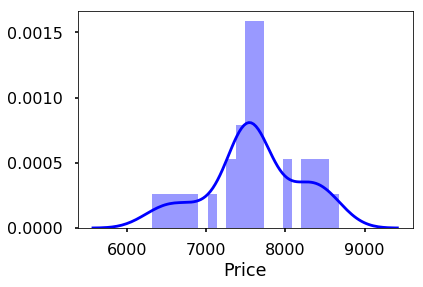

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot a linear regression between 'Date' and 'Price'
#df2 = df2_byday.set_index('Date')
#df2.sort_index(inplace=True)
#df2 = sns.load_dataset('df2')
#df2.head()
#sns.lmplot(x ='Date', y ='Price', data=df2)
#plt.show()
df5_byday2010to2018 = df_byday[['Date','Price']]
df5 = df5_byday2010to2018.set_index('Date')
df5.sort_index(inplace=True)
sns.distplot(df_byday['Price'], color ="blue", bins= 20)

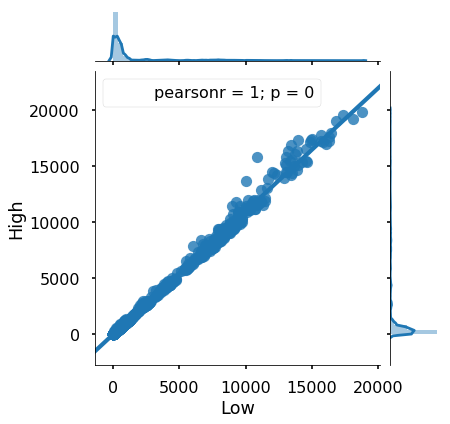

In [28]:
sns.jointplot(x='Low', y='High', data= df_byday2010to2018, kind='reg')

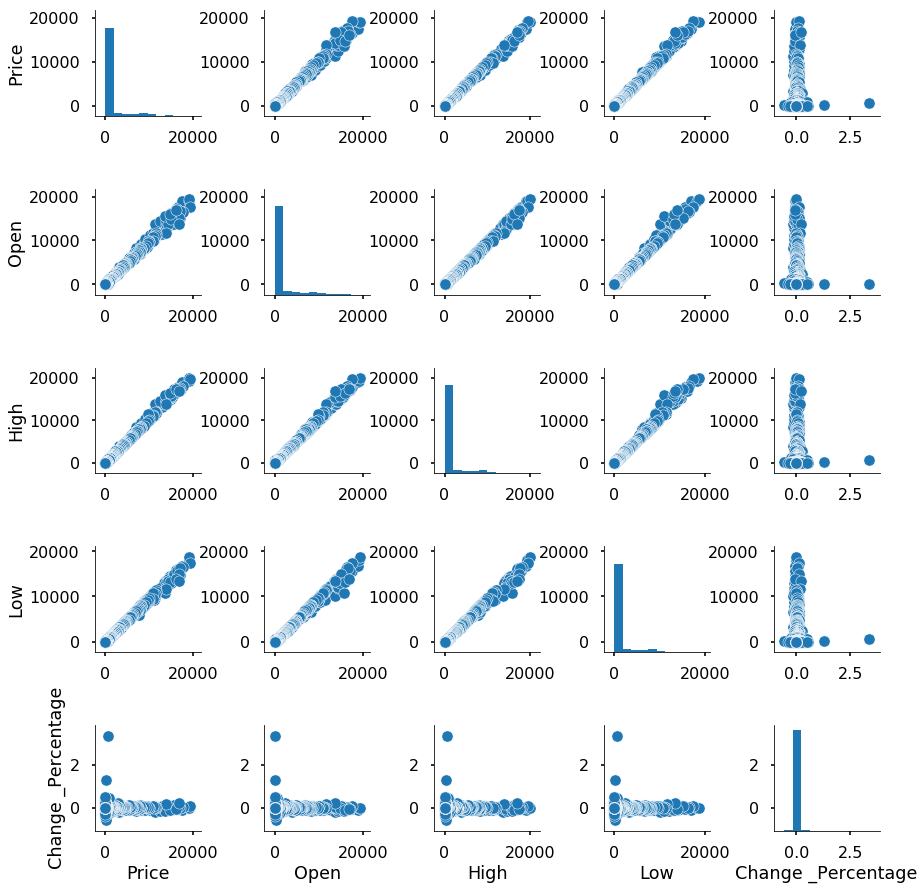

In [29]:
# Explore all the relationships between different numerical data values
# across the dataframe of Bitcoin Market trend on a DAILY schedule from 2010 to 2018
sns.pairplot(df_byday2010to2018)

In [30]:
#load the data: The dataset contains statistics from July 1, 2017 to June 16th, 2018 on an HOURLY basis
df_byhour= pd.read_excel("Coinbase_BTCUSD_1h.xlsx")
df_byhour.head()

Date  Symbol     Open     High      Low    Close  Volume From  \
0  2018-06-16 08-PM  BTCUSD  6497.97  6529.99  6495.97  6526.17       119.63   
1  2018-06-16 07-PM  BTCUSD  6509.68  6513.00  6485.00  6497.97       168.35   
2  2018-06-16 06-PM  BTCUSD  6527.24  6531.32  6501.00  6509.68       133.16   
3  2018-06-16 05-PM  BTCUSD  6520.67  6544.00  6492.30  6527.24       298.86   
4  2018-06-16 04-PM  BTCUSD  6363.82  6549.99  6340.07  6520.67       708.27   

    Volume To  
0   779629.68  
1  1094327.18  
2   867577.32  
3  1948546.21  
4  4584380.01

In [31]:
df_byhour.tail()

Date  Symbol     Open     High      Low    Close  \
8400  2017-07-01 03-PM  BTCUSD  2459.35  2475.00  2450.00  2467.83   
8401  2017-07-01 02-PM  BTCUSD  2454.43  2473.93  2450.83  2459.35   
8402  2017-07-01 01-PM  BTCUSD  2488.43  2488.43  2454.40  2454.43   
8403  2017-07-01 12-PM  BTCUSD  2509.17  2512.87  2484.99  2488.43   
8404  2017-07-01 11-AM  BTCUSD  2505.56  2513.38  2495.12  2509.17   

      Volume From  Volume To  
8400       276.82  682105.41  
8401       289.42  712864.80  
8402       280.28  693254.01  
8403       157.36  393142.50  
8404       114.60  287000.32

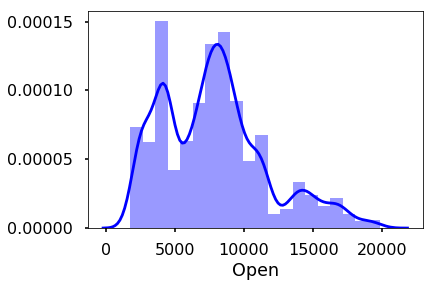

In [32]:
# Graphing the Open Price Histogram of Bitcoin trading on hourly schedule for the past year
df6_BTCbyhour = df_byhour[['Date','Open']]
df6 = df6_BTCbyhour.set_index('Date')
df6.sort_index(inplace=True)
sns.distplot(df6_BTCbyhour['Open'], color ="blue", bins= 20)

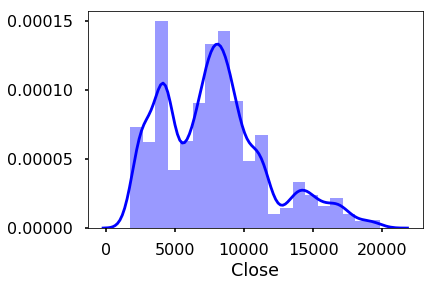

In [33]:
sns.distplot(df_byhour['Close'], color ="blue",bins= 20)

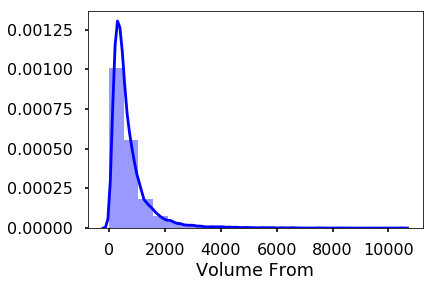

In [34]:
sns.distplot(df_byhour['Volume From'], color ="blue", bins= 20)

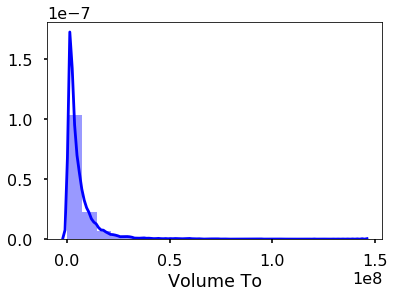

In [35]:
sns.distplot(df_byhour['Volume To'], color ="blue", bins= 20)

In [36]:
df7_BTCbyhour = df_byhour[['Date','Open', 'Close']]
df7 = df6_BTCbyhour.set_index('Date')
df7.sort_index(inplace=True)

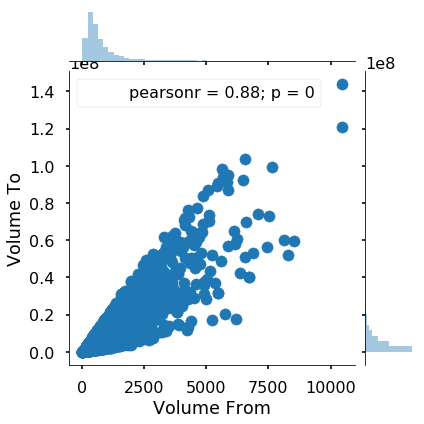

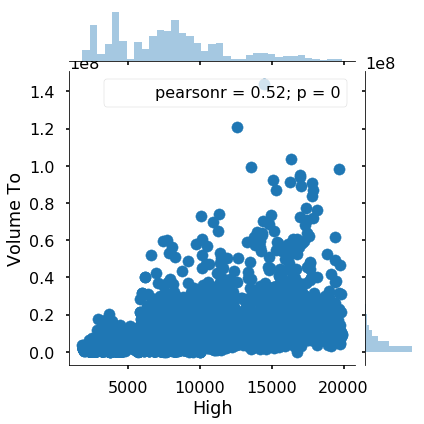

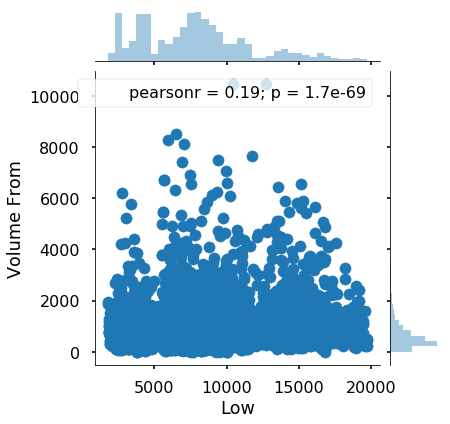

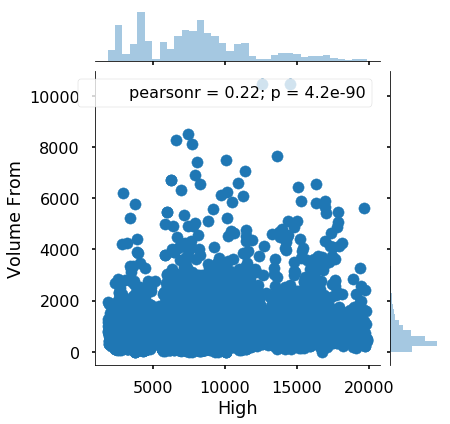

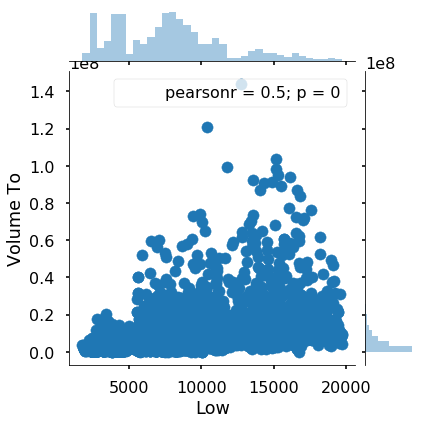

In [37]:
# Expore the relationship between the "Volume From" to "Voume To"  of Bitcoin Hourly Trading
# between July 1st, 2017 to June 16, 2018
sns.jointplot(x='Volume From', y='Volume To', data=df_byhour)
#sns.jointplot(x='Open', y='Close', data=df_byhour)
#sns.jointplot(x='Low', y='High', data=df_byhour)
sns.jointplot(x='High', y='Volume To', data=df_byhour)
sns.jointplot(x='Low', y='Volume From', data=df_byhour)
sns.jointplot(x='High', y='Volume From', data=df_byhour)
sns.jointplot(x='Low', y='Volume To', data=df_byhour)

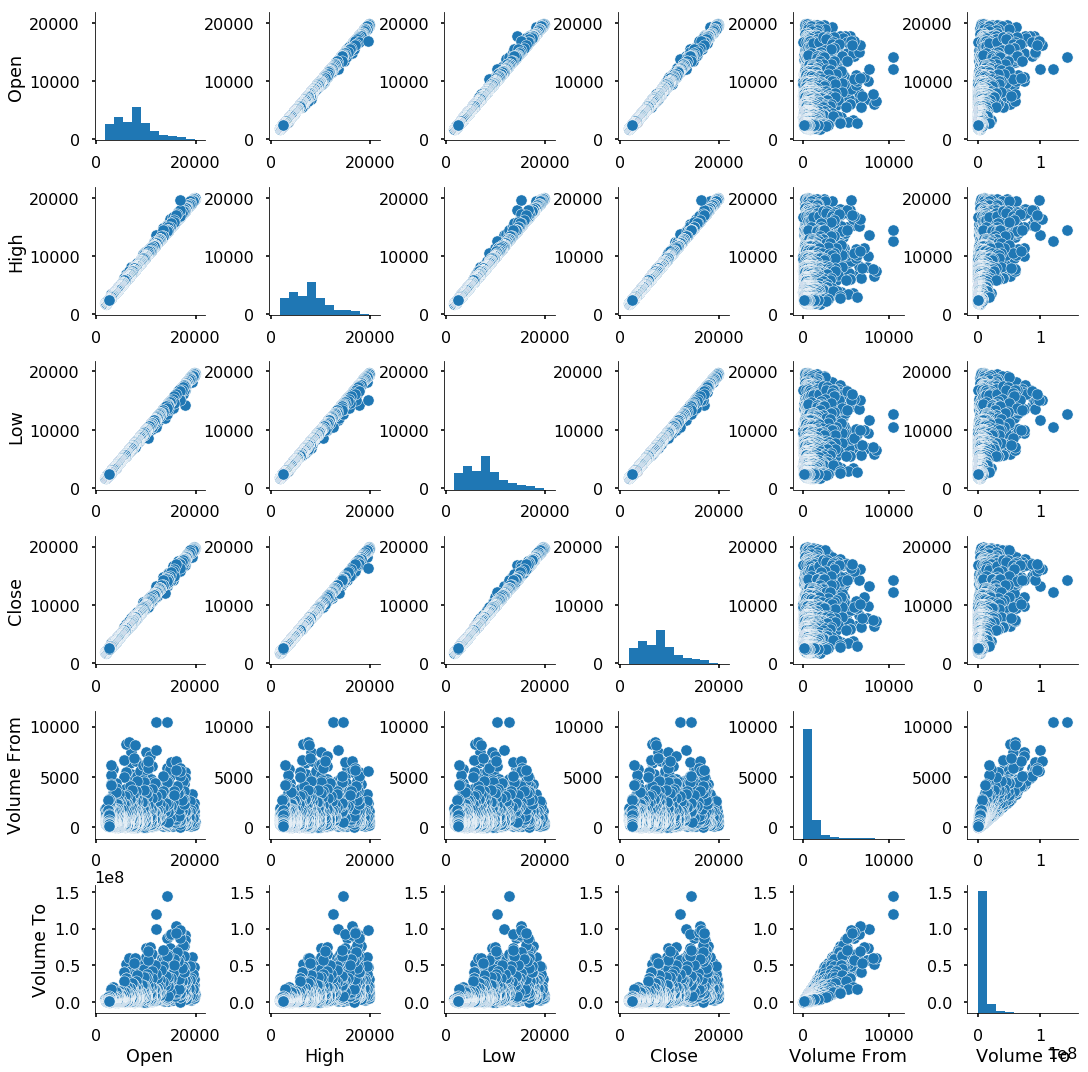

In [38]:
# Explore all the relationships between different numerical data values
# across the dataframe of Bitcoin Market trend on a HOURLY schedule from July 2017 to June 2018
sns.pairplot(df_byhour)

In [39]:
# Show the heatmap of Correlation Matrix of Open, High, Low, Close, Volume From
# and Volume To
df_byhour.corr()

Open      High       Low     Close  Volume From  Volume To
Open         1.000000  0.999685  0.999515  0.999476     0.205742   0.512471
High         0.999685  1.000000  0.999274  0.999689     0.216963   0.523064
Low          0.999515  0.999274  1.000000  0.999647     0.190479   0.497283
Close        0.999476  0.999689  0.999647  1.000000     0.205607   0.512188
Volume From  0.205742  0.216963  0.190479  0.205607     1.000000   0.876160
Volume To    0.512471  0.523064  0.497283  0.512188     0.876160   1.000000

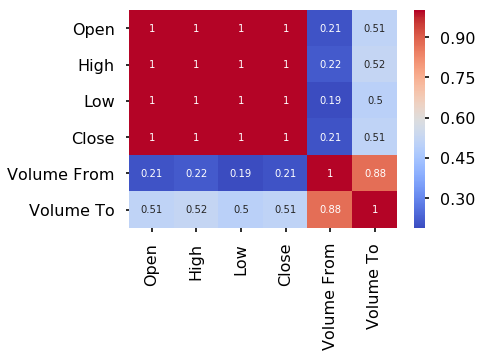

In [40]:
hm = df_byhour.corr()
sns.heatmap(hm, annot=True, cmap='coolwarm')

In [41]:
df7_BTCbyhour = df_byhour[['Date','Open', 'Close', 'High', 'Low']]
df7 = df7_BTCbyhour.set_index('Date')
df7.sort_index(inplace=True)
df7.iplot()

In [42]:
df8_BTCbyhour = df_byhour[['Date','Volume From','Volume To']]
df8 = df8_BTCbyhour.set_index('Date')
df8.sort_index(inplace=True)
df8.iplot()

In [43]:
## Machine Learning Part 

In [44]:
## Linear Regression

In [45]:
df_byday2010to2018.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change _Percentage'], dtype='object')

In [46]:
# Linear Regression
X = df_byday2010to2018[[ 'Open', 'High', 'Low', 'Change _Percentage']]

In [47]:
#f1_byday2010to2018 = df_byday2010to2018.set_index('Date')
y = df_byday2010to2018['Price']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
#Training the Model

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression() # Create an instance of a linearRegression() model named lm

In [53]:
#Traint/fit on the training data
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
print(lm.intercept_)

-0.5226687900672005


In [55]:
# Print out the coefficients of the model
lm.coef_

array([-0.47447773,  0.94213551,  0.52286361, 22.38497762])

In [56]:
X_train.columns

Index(['Open', 'High', 'Low', 'Change _Percentage'], dtype='object')

In [57]:
## Predictions

Text(0,0.5,'Predicted Values')

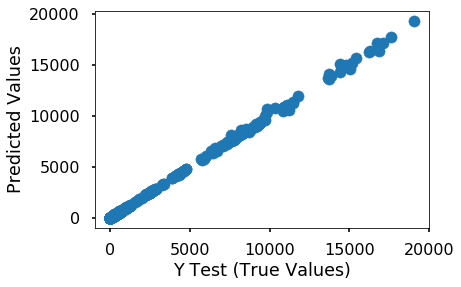

In [58]:
# Create a scatterplot of the real test values versus the predicted values
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

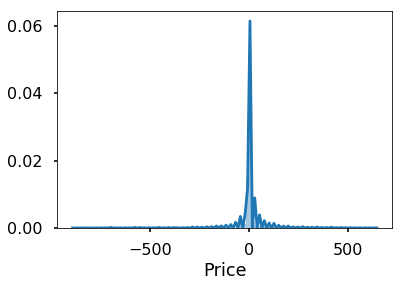

In [59]:
sns.distplot((y_test-predictions), bins=100)

In [60]:
## Evaluating the model

# We evaluated our model performance by calculating the residual sum of squares and
# explained variance score (R^2)

# Calculated the Mean Absolute Error, Mean Squared Error and the Root Mean
# Sqauared Error

from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 21.074439372297952
MSE: 5521.7247260427475
RMSE: 74.30830859360714


In [61]:
metrics.explained_variance_score(y_test, predictions)

0.999425277477499

In [62]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

Coeff
Open                -0.474478
High                 0.942136
Low                  0.522864
Change _Percentage  22.384978

In [63]:
## Machine Learning using RNN and Tensorflow

#Load data and remove the unused field -"Date"

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras import initializers
from datetime import datetime
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

#Check to seee if there are any missing values in the dataset
df_byhour.isnull().values.any()

Using TensorFlow backend.


False

In [64]:
#load the data: The dataset contains last 8 years' DAILY statistics from 2010 to 2018
df_byhour= pd.read_excel("Coinbase_BTCUSD_1h.xlsx", index_col ="Date")

#Show the datset from the past month of Bitcoin ststistics
df_byhour.head()

Symbol     Open     High      Low    Close  Volume From  \
Date                                                                        
2018-06-16 08-PM  BTCUSD  6497.97  6529.99  6495.97  6526.17       119.63   
2018-06-16 07-PM  BTCUSD  6509.68  6513.00  6485.00  6497.97       168.35   
2018-06-16 06-PM  BTCUSD  6527.24  6531.32  6501.00  6509.68       133.16   
2018-06-16 05-PM  BTCUSD  6520.67  6544.00  6492.30  6527.24       298.86   
2018-06-16 04-PM  BTCUSD  6363.82  6549.99  6340.07  6520.67       708.27   

                   Volume To  
Date                          
2018-06-16 08-PM   779629.68  
2018-06-16 07-PM  1094327.18  
2018-06-16 06-PM   867577.32  
2018-06-16 05-PM  1948546.21  
2018-06-16 04-PM  4584380.01

In [65]:
df_byhour.tail()

Symbol     Open     High      Low    Close  Volume From  \
Date                                                                        
2017-07-01 03-PM  BTCUSD  2459.35  2475.00  2450.00  2467.83       276.82   
2017-07-01 02-PM  BTCUSD  2454.43  2473.93  2450.83  2459.35       289.42   
2017-07-01 01-PM  BTCUSD  2488.43  2488.43  2454.40  2454.43       280.28   
2017-07-01 12-PM  BTCUSD  2509.17  2512.87  2484.99  2488.43       157.36   
2017-07-01 11-AM  BTCUSD  2505.56  2513.38  2495.12  2509.17       114.60   

                  Volume To  
Date                         
2017-07-01 03-PM  682105.41  
2017-07-01 02-PM  712864.80  
2017-07-01 01-PM  693254.01  
2017-07-01 12-PM  393142.50  
2017-07-01 11-AM  287000.32

In [66]:
from datetime import date
d0 = date(2018,6,16)
d1=date(2018,7,18)
delta = d1 -d0
days_look = delta.days + 1
print("There are", days_look, "days in this dataframe")

There are 33 days in this dataframe


In [67]:
# Training Test Split

In [68]:
df_byhour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8405 entries, 2018-06-16 08-PM to 2017-07-01 11-AM
Data columns (total 7 columns):
Symbol         8405 non-null object
Open           8405 non-null float64
High           8405 non-null float64
Low            8405 non-null float64
Close          8405 non-null float64
Volume From    8405 non-null float64
Volume To      8405 non-null float64
dtypes: float64(6), object(1)
memory usage: 525.3+ KB


In [69]:
# Creat a new datframe that exlcudes "Symbol" Columns
df = df_byhour[['Open','High','Low','Close','Volume From','Volume To']]
df.sort_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8405 entries, 2017-07-01 01-PM to 2018-06-16 12-PM
Data columns (total 6 columns):
Open           8405 non-null float64
High           8405 non-null float64
Low            8405 non-null float64
Close          8405 non-null float64
Volume From    8405 non-null float64
Volume To      8405 non-null float64
dtypes: float64(6)
memory usage: 459.6+ KB


In [70]:
# Split into training and testing on 80/20 split rule

train_set = df.head(6724)
test_set = df.tail(1681)

In [71]:
# Scale the Data
# use sklearn.preprocessing to scale the data using the MinMaxScaler. 
# Only fit_transform on the training data, then transform the test data. 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [72]:
train_scaled =scaler.fit_transform(train_set)
test_scaled = scaler.transform(test_set)

In [73]:
def next_batch(training_data,batch_size,steps):
    
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [91]:
## Setting up The RNN Model, the following features are needed:
# Number of Inputs()
# Number of Time Steps ()
# Number of Neurons per Layer ()
# Number of Output()
# Learning Rate()
# Number of Iterations for Trading ()
# Batch Size()

# we need only the time series, single feature
num_inputs = 1
# Number of steps in each batch
#num_time_steps = 30
# we set 100 neuron layer for now, this can be optimized
num_neurons = 100
# we need only just the time series output
num_outputs = 1
# we can try increasing iterations, but decreasing learning rate
learning_rate = 0.03
# number of iterations to go through (training steps), you can play with this
num_train_iterations = 4000
# Size of the batch of data
batch_size = 256


In [75]:
# Create Placeholders for X and y. 
# The shape for these placeholders should be [None,num_time_steps-1,num_inputs] and [None, num_time_steps-1, num_outputs] 
# The reason we use num_time_steps-1 is because each of these will be one step shorter than the original time steps size, because we are training the RNN network to predict one point into the future based on the input sequence.
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [76]:
# Next we create the RNN Layer using Basic LSTM Cell
with tf.variable_scope('lstm_cell'):
    cell = tf.contrib.rnn.OutputProjectionWrapper(
        tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),output_size=num_outputs) 

In [77]:

# Next we pass in the cells variable into tf.nn.dynamic_rnn, along with our firstholder
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32) 


In [78]:
## Loss Function and Optimizer
## Create a Mean Squared Error Loss Function and use it to minimize an AdamOptimizer
## and pass in the learning rate
loss= tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train=optimizer.minimize(loss)

In [79]:
## Initilize the global variables
init = tf.global_variables_initializer()

In [80]:
## Create an instance on tf.train.Saver()
saver = tf.train.Saver()

In [81]:
## Session
# create gpu_options processor that uses 90% memory
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [92]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

ValueError: cannot reshape array of size 186 into shape (1,31)